<a href="https://colab.research.google.com/github/Parkseoho/DAStudy-sun2/blob/main/SEOHO/2024_01_12_%EC%9D%80%ED%96%89_%EC%98%88%EC%B8%A1_seoho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
Test= pd.read_csv('test.csv')

In [5]:
train = pd.read_csv('train.csv')
Test_X = pd.read_csv('test.csv')
Test = Test_X.copy()

In [6]:
Train_X, Train_Y = train.drop('Exited',axis=1) , train['Exited']

In [7]:
Train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


In [8]:
Train_X.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [9]:
Train_X.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [10]:
# 칼럼들간의 상관관계는 없음

Train_X.corr()

<ipython-input-10-b27982832042>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Train_X.corr()


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,1.000000,-0.000387,-0.001201,0.004039,-0.002560,0.000606,-0.000094,-0.004706,0.000418,-0.001552
CustomerId,-0.000387,1.000000,0.007364,0.002696,-0.001252,-0.008348,0.004380,-0.005469,-0.002934,0.002891
CreditScore,-0.001201,0.007364,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820
Age,0.004039,0.002696,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399
Tenure,-0.002560,-0.001252,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971
Balance,0.000606,-0.008348,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586
NumOfProducts,-0.000094,0.004380,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285
HasCrCard,-0.004706,-0.005469,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438
IsActiveMember,0.000418,-0.002934,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080
EstimatedSalary,-0.001552,0.002891,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000


In [11]:
# id, Surname, Geography, Gender 4개의 칼럼 중복제거시 중복제거되는 데이터 없음
# 분류할 수 있는 값을 id, CustomerID, Surname 칼럼 제거

Train_X.drop_duplicates(['id','Surname','Geography','Gender'])

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [12]:
Train_X = Train_X.drop(columns=['id','CustomerId','Surname'])
Test_X = Test_X.drop(columns=['id','CustomerId','Surname'])

In [13]:
for i in Train_X.columns:
  print(i, Train_X[i].nunique())

CreditScore 457
Geography 3
Gender 2
Age 71
Tenure 11
Balance 30075
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 55298


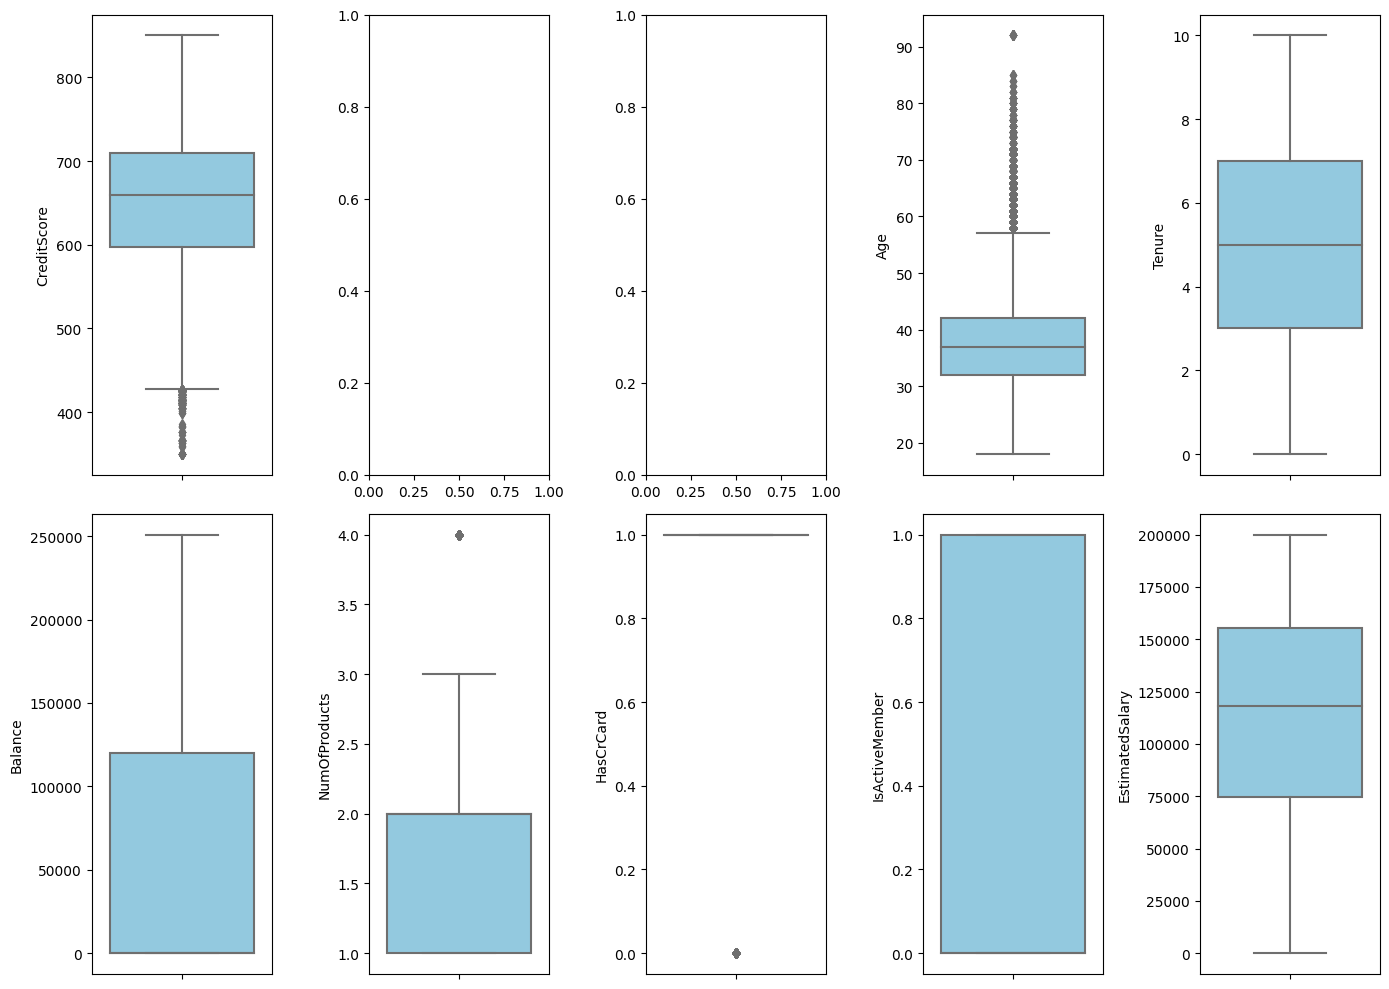

In [20]:
fig, axes = plt.subplots(2,5,figsize=(14,10))
for i , (col ,ax) in enumerate(zip(Train_X.columns , axes.flatten())):
    if Train_X[col].dtypes in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        sns.boxplot(y=Train_X[col], ax=ax, color='skyblue')
plt.tight_layout()
plt.show()


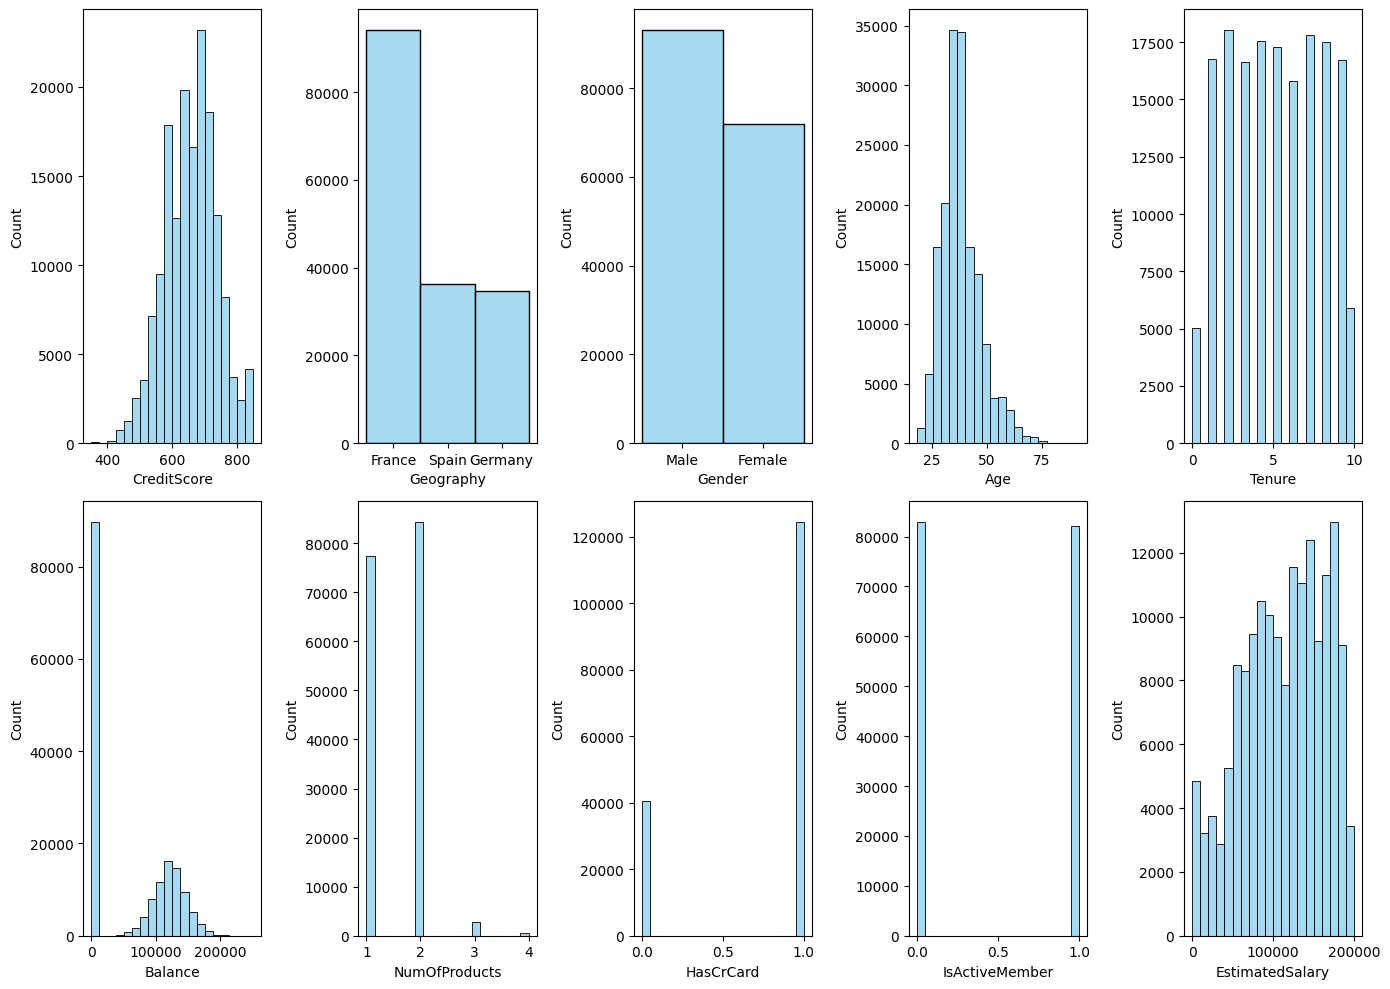

In [15]:

fig, axes = plt.subplots(2,5,figsize=(14,10))
for i , (col ,ax) in enumerate(zip(Train_X , axes.flatten())):
    if i<len(Train_X):
        sns.histplot(x=Train_X[col] , bins=20, ax=ax, edgecolor='black' , color='skyblue')
plt.tight_layout()
plt.show()

In [ ]:
# 연령대 10대 단위로 분류


Train_X['Age'] = ((Train_X['Age'] // 10) *10).astype(int)

In [ ]:
# object type형 unique한 값이 적어 dummies로 변환

a = pd.get_dummies(Train_X[['Age','Geography','Gender','HasCrCard','IsActiveMember']],drop_first=True)
Train_X = pd.concat([Train_X.drop(columns=['Age','Geography','Gender','HasCrCard','IsActiveMember']),a],axis=1)


b = pd.get_dummies(Test_X[['Age','Geography','Gender','HasCrCard','IsActiveMember']],drop_first=True)
Test_X = pd.concat([Test_X.drop(columns=['Age','Geography','Gender','HasCrCard','IsActiveMember']),b],axis=1)

In [ ]:
Train_X.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48
Age,165034.0,33.571567,9.361306,10.00,30.00,30.0,40.0000,90.00
HasCrCard,165034.0,0.753954,0.430707,0.00,1.00,1.0,1.0000,1.00
IsActiveMember,165034.0,0.497770,0.499997,0.00,0.00,0.0,1.0000,1.00
Geography_Germany,165034.0,0.209690,0.407089,0.00,0.00,0.0,0.0000,1.00
Geography_Spain,165034.0,0.219428,0.413860,0.00,0.00,0.0,0.0000,1.00


In [ ]:
def IQR_Rule(val):
  Q1= np.quantile(val,0.25)
  Q3 = np.quantile(val,0.75)
  IQR = Q3 - Q1

  filter = (Q3 + IQR*1.5 > val) & (Q1-IQR*1.5<val)
  return filter

In [ ]:
condition = ['CreditScore','Balance','NumOfProducts','EstimatedSalary']

In [ ]:
# IQR 활용 이상치 제거

ab = Train_X[condition].apply(IQR_Rule)
abc = ab.sum(axis=1) == len(Train_X[condition].columns)
Train_X = Train_X[abc]

In [ ]:
Train_Y = Train_Y[Train_Y.index.isin(Train_X.index)]

In [ ]:
Train_X

,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary,Age,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,668,3,0.00,2,181449.97,30,1.0,0.0,0,0,1
1,627,1,0.00,2,49503.50,30,1.0,1.0,0,0,1
2,678,10,0.00,2,184866.69,40,1.0,0.0,0,0,1
3,581,2,148882.54,1,84560.88,30,1.0,1.0,0,0,1
4,716,5,0.00,2,15068.83,30,1.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0.00,1,131834.75,30,1.0,1.0,0,1,0
165030,792,3,0.00,1,131834.45,30,0.0,0.0,0,0,1
165031,565,5,0.00,1,127429.56,30,1.0,1.0,0,0,1
165032,554,7,161533.00,1,71173.03,30,0.0,1.0,0,1,0


In [ ]:
# 크게 변수의 왜도 치우침이 있는 칼럼은 없음

Train_X.skew()

CreditScore         -0.026402
Tenure               0.006485
Balance              0.384280
NumOfProducts        0.161178
EstimatedSalary     -0.309041
Age                  0.855830
HasCrCard           -1.180451
IsActiveMember       0.007036
Geography_Germany    1.430346
Geography_Spain      1.354855
Gender_Male         -0.261628
dtype: float64

In [ ]:
# 연속형 변수의 스케일 차이가 큼
# 스케일 조정

Train_X[condition].max() - Train_X[condition].min()

CreditScore           422.00
Balance            250898.09
NumOfProducts           2.00
EstimatedSalary    199980.90
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(Train_X[condition])
s_Train_X = scaler.transform(Train_X[condition])
s_Test_X = scaler.transform(Test_X[condition])

In [ ]:
Train_X[condition] = s_Train_X
Test_X[condition] = s_Test_X

In [ ]:
Train_X[condition].max() - Train_X[condition].min()

CreditScore        1.0
Balance            1.0
NumOfProducts      1.0
EstimatedSalary    1.0
dtype: float64

In [ ]:
Train_Y.value_counts()

0    129858
1     34450
Name: Exited, dtype: int64

In [ ]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

3.769462989840348

In [ ]:
# # kNN을 사용한 클래스 불균형 테스트


# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.metrics import *
# kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)
# pred_Y = kNN_model.predict(Train_X)
# print(recall_score(Train_Y, pred_Y))
# print(accuracy_score(Train_Y, pred_Y))

In [ ]:
# from imblearn.under_sampling import NearMiss

# nm = NearMiss(version= 2, sampling_strategy = {1:Train_Y.value_counts().iloc[-1],
#                                                0 :Train_Y.value_counts().iloc[-1]*2 })

# n_Train_X ,n_Train_Y = nm.fit_resample(Train_X,Train_Y)
# n_Train_X = pd.DataFrame(n_Train_X, columns = Train_X.columns)
# n_Train_Y = pd.Series(n_Train_Y)

In [ ]:
continuous_cols = [col for col in Train_X.columns if len(Train_X[col].unique())>3]
binary_cols = [col for col in Train_X.columns if len(Train_X[col].unique())<=3]

In [ ]:
for i in Train_X.columns:
  print(i,Train_X[i].nunique())

CreditScore 423
Tenure 11
Balance 29985
NumOfProducts 3
EstimatedSalary 55186
Age 9
HasCrCard 2
IsActiveMember 2
Geography_Germany 2
Geography_Spain 2
Gender_Male 2


In [ ]:
from sklearn.feature_selection import *
continous_cols_pvals = f_classif(Train_X[continuous_cols], Train_Y)[1]
binary_cols_pvals = chi2(Train_X[binary_cols], Train_Y)[1]

In [ ]:
cont_pvals = pd.Series(continous_cols_pvals, index = continuous_cols)
binary_pvals = pd.Series(binary_cols_pvals, index = binary_cols)

In [ ]:
pvals = pd.concat([cont_pvals, binary_pvals])
pvals.sort_values(ascending = True, inplace = True)

In [ ]:
# from sklearn.model_selection import ParameterGrid
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier


# models = [
#     KNeighborsClassifier,
#     SVC,
#     DecisionTreeClassifier,
#     RandomForestClassifier,
#     GradientBoostingClassifier,
#     MLPClassifier
# ]

# param_grid = {
#     KNeighborsClassifier: ParameterGrid({"n_neighbors": [3, 5, 7], "metric": ['euclidean', 'manhattan']}),
#     SVC: ParameterGrid({"C": [0.1, 1, 10], "kernel": ['rbf', 'linear']}),
#     DecisionTreeClassifier: ParameterGrid({"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}),
#     RandomForestClassifier: ParameterGrid({"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),
#     GradientBoostingClassifier: ParameterGrid({"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),
#     MLPClassifier: ParameterGrid({"hidden_layer_sizes": [(10,), (20,), (30,)], "alpha": [0.0001, 0.001, 0.01]})
# }


# def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
#     best_model = None
#     best_param = None
#     best_score = -1

#     for param in param_grid:
#         model = model_func(**param).fit(Train_X, Train_Y)
#         pred_Y = model.predict(Train_X)
#         score = roc_auc_score(Train_Y, pred_Y)

#         if score > best_score:
#             best_model = model
#             best_param = param
#             best_score = score

#     return best_model, best_param, best_score



# best_models = {}
# for model_func in models:
#     grid = param_grid.get(model_func, ParameterGrid({}))
#     best_model, best_param, best_score = tune_hyperparameters(model_func, grid, Train_X, Train_Y, Test_X)
#     best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score}


# for model_func, result in best_models.items():
#     print(f"Model: {model_func.__name__}")
#     print(f"Best Parameters: {result['best_param']}")
#     print(f"Best roc_auc_score Score: {result['best_score']}\n")


In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier


models = [
    KNeighborsClassifier,

]

param_grid = {

    KNeighborsClassifier: ParameterGrid({"n_neighbors": [3, 5, 7], "metric": ['euclidean', 'manhattan']})
}

def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score
            best_feature = Train_X.columns
    return best_model, best_param, best_score,best_feature


best_models = {}
for k in range(3,12):
  s_Train_X = Train_X[pvals.iloc[:k].index]
  s_Test_X = Test_X[pvals.iloc[:k].index]
  for model_func in models:
      grid = param_grid.get(model_func, ParameterGrid({}))
      best_model, best_param, best_score,best_feature = tune_hyperparameters(model_func, grid, s_Train_X, Train_Y, s_Test_X)
      best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score,'best_feature':best_feature}


  for model_func, result in best_models.items():
      print(f"Model: {model_func.__name__}")
      print(f"Best Parameters: {result['best_param']}")
      print(f"Best roc_auc_score Score: {result['best_score']}\n")
      print(f"Best best_feature: {len(result['best_feature'])}\n")

Model: KNeighborsClassifier
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best roc_auc_score Score: 0.7610481329377063

Model: KNeighborsClassifier
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best roc_auc_score Score: 0.7868490196984399

Model: KNeighborsClassifier
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best roc_auc_score Score: 0.7971883927427618

Model: KNeighborsClassifier
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best roc_auc_score Score: 0.7935182768915321

Model: KNeighborsClassifier
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best roc_auc_score Score: 0.7997489583408077

Model: KNeighborsClassifier
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best roc_auc_score Score: 0.8076591306690455

Model: KNeighborsClassifier
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best roc_auc_score Score: 0.8191500377514069

Model: KNeighborsClassifier
Best Parameters: {'metric': 'euclidean', 

9

In [ ]:
# model = KNeighborsClassifier(**best_param).fit(Train_X,Train_Y)
# pred_Y = model.predict(Test_X)
model = KNeighborsClassifier(metric =  'euclidean', n_neighbors=3).fit(Train_X[pvals.iloc[:-2].index],Train_Y)
pred_Y = model.predict(Test_X[pvals.iloc[:-2].index])
submission = pd.DataFrame({'id' : Test['id'],
                           'Exited':pred_Y})
submission.to_csv('KNeighborsClassifier.csv',index=False)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = [

    DecisionTreeClassifier

]

param_grid = {

    DecisionTreeClassifier: ParameterGrid({"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}),
}


def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score

    return best_model, best_param, best_score



best_models = {}
for model_func in models:
    grid = param_grid.get(model_func, ParameterGrid({}))
    best_model, best_param, best_score = tune_hyperparameters(model_func, grid, Train_X, Train_Y, Test_X)
    best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score}


for model_func, result in best_models.items():
    print(f"Model: {model_func.__name__}")
    print(f"Best Parameters: {result['best_param']}")
    print(f"Best roc_auc_score Score: {result['best_score']}\n")

Model: DecisionTreeClassifier
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best roc_auc_score Score: 0.999245283018868



In [ ]:
model = DecisionTreeClassifier(**best_param).fit(Train_X,Train_Y)
pred_Y = model.predict(Test_X)
submission = pd.DataFrame({'id' : Test['id'],
                           'Exited':pred_Y})
submission.to_csv('DecisionTreeClassifier.csv',index=False)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier


models = [

    RandomForestClassifier

]

param_grid = {

    RandomForestClassifier: ParameterGrid({"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),

}

def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score
            best_feature = Train_X.columns
    return best_model, best_param, best_score,best_feature


best_models = {}
for k in range(3,12):
  s_Train_X = Train_X[pvals.iloc[:k].index]
  s_Test_X = Test_X[pvals.iloc[:k].index]
  for model_func in models:
      grid = param_grid.get(model_func, ParameterGrid({}))
      best_model, best_param, best_score,best_feature = tune_hyperparameters(model_func, grid, s_Train_X, Train_Y, s_Test_X)
      best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score,'best_feature':best_feature}


  for model_func, result in best_models.items():
      print(f"Model: {model_func.__name__}")
      print(f"Best Parameters: {result['best_param']}")
      print(f"Best roc_auc_score Score: {result['best_score']}\n")
      print(f"Best best_feature: {len(result['best_feature'])}\n")

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best roc_auc_score Score: 0.8256935789704065

Best best_feature: 3

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best roc_auc_score Score: 0.8363692087825038

Best best_feature: 4

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best roc_auc_score Score: 0.8542773550056834

Best best_feature: 5

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best roc_auc_score Score: 0.8776594952517187

Best best_feature: 6

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best roc_auc_score Score: 0.8772287150052325

Best best_feature: 7

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best roc_auc_score Score: 0.9227216910216164

Best best_feature: 8

Model: RandomForestClassifier
Best Parameters: {'max_depth': Non

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = [

    RandomForestClassifier

]

param_grid = {

    RandomForestClassifier: ParameterGrid({"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),

}


def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score

    return best_model, best_param, best_score



best_models = {}
for model_func in models:
    grid = param_grid.get(model_func, ParameterGrid({}))
    best_model, best_param, best_score = tune_hyperparameters(model_func, grid, Train_X, Train_Y, Test_X)
    best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score}


for model_func, result in best_models.items():
    print(f"Model: {model_func.__name__}")
    print(f"Best Parameters: {result['best_param']}")
    print(f"Best roc_auc_score Score: {result['best_score']}\n")

# model = RandomForestClassifier(**best_param).fit(Train_X,Train_Y)
# pred_Y = model.predict(Test_X)
# submission = pd.DataFrame({'id' : Test_X['id'],
#                            'Exited':pred_Y})
# submission.to_csv('RandomForestClassifier_predit.csv',index=False)

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best roc_auc_score Score: 0.9994585515883702



In [ ]:
model = RandomForestClassifier(**best_param).fit(Train_X,Train_Y)
pred_Y = model.predict(Test_X)

In [ ]:
submission = pd.DataFrame({'id' : Test['id'],
                           'Exited':pred_Y})
submission.to_csv('RandomForestClassifier_predit.csv',index=False)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = [

    GradientBoostingClassifier

]

param_grid = {

    GradientBoostingClassifier: ParameterGrid({"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),

}


def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score

    return best_model, best_param, best_score



best_models = {}
for model_func in models:
    grid = param_grid.get(model_func, ParameterGrid({}))
    best_model, best_param, best_score = tune_hyperparameters(model_func, grid, Train_X, Train_Y, Test_X)
    best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score}


for model_func, result in best_models.items():
    print(f"Model: {model_func.__name__}")
    print(f"Best Parameters: {result['best_param']}")
    print(f"Best roc_auc_score Score: {result['best_score']}\n")


Model: GradientBoostingClassifier
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best roc_auc_score Score: 0.7529445243538432



In [ ]:
# model = GradientBoostingClassifier(**best_param).fit(Train_X,Train_Y)
# pred_Y = model.predict(Test_X)
# submission = pd.DataFrame({'id' : Test_X['id'],
#                            'Exited':pred_Y})
# submission.to_csv('GradientBoostingClassifier_predit.csv',index=False)

In [ ]:
submission = pd.DataFrame({'id' : Test['id'],
                           'Exited':pred_Y})
submission.to_csv('GradientBoostingClassifier_predit.csv',index=False)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = [

    MLPClassifier
]

param_grid = {

    MLPClassifier: ParameterGrid({"hidden_layer_sizes": [(10,), (20,), (30,)], "alpha": [0.0001, 0.001, 0.01]})
}

def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score
            best_feature = Train_X.columns
    return best_model, best_param, best_score,best_feature


best_models = {}
for k in range(3,12):
  s_Train_X = Train_X[pvals.iloc[:k].index]
  s_Test_X = Test_X[pvals.iloc[:k].index]
  for model_func in models:
      grid = param_grid.get(model_func, ParameterGrid({}))
      best_model, best_param, best_score,best_feature = tune_hyperparameters(model_func, grid, s_Train_X, Train_Y, s_Test_X)
      best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score,'best_feature':best_feature}


  for model_func, result in best_models.items():
      print(f"Model: {model_func.__name__}")
      print(f"Best Parameters: {result['best_param']}")
      print(f"Best roc_auc_score Score: {result['best_score']}")
      print(f"Best best_feature: {len(result['best_feature'])}\n")

Model: MLPClassifier
Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (20,)}
Best roc_auc_score Score: 0.7513644302012061

Best best_feature: 3

Model: MLPClassifier
Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (10,)}
Best roc_auc_score Score: 0.7315212322688704

Best best_feature: 4

Model: MLPClassifier
Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (30,)}
Best roc_auc_score Score: 0.7375822886676192

Best best_feature: 5

Model: MLPClassifier
Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (30,)}
Best roc_auc_score Score: 0.7701388069732795

Best best_feature: 6

Model: MLPClassifier
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (30,)}
Best roc_auc_score Score: 0.7439735186012382

Best best_feature: 7

Model: MLPClassifier
Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (30,)}
Best roc_auc_score Score: 0.74159879002365

Best best_feature: 8

Model: MLPClassifier
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (20,)}
Best roc

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = [

    MLPClassifier
]

param_grid = {

    MLPClassifier: ParameterGrid({"hidden_layer_sizes": [(10,), (20,), (30,)], "alpha": [0.0001, 0.001, 0.01]})
}


def tune_hyperparameters(model_func, param_grid, Train_X, Train_Y, Test_X):
    best_model = None
    best_param = None
    best_score = -1

    for param in param_grid:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Train_X)
        score = roc_auc_score(Train_Y, pred_Y)

        if score > best_score:
            best_model = model
            best_param = param
            best_score = score

    return best_model, best_param, best_score



best_models = {}
for model_func in models:
    grid = param_grid.get(model_func, ParameterGrid({}))
    best_model, best_param, best_score = tune_hyperparameters(model_func, grid, Train_X, Train_Y, Test_X)
    best_models[model_func] = {'best_model': best_model, 'best_param': best_param, 'best_score': best_score}


for model_func, result in best_models.items():
    print(f"Model: {model_func.__name__}")
    print(f"Best Parameters: {result['best_param']}")
    print(f"Best roc_auc_score Score: {result['best_score']}\n")


Model: MLPClassifier
Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (30,)}
Best roc_auc_score Score: 0.7647556065539134



In [ ]:
# model = MLPClassifier(**best_param).fit(Train_X[best_feature],Train_Y)
# pred_Y = model.predict(Test_X[best_feature])
# submission = pd.DataFrame({'id' : Test['id'],
#                            'Exited':pred_Y})
# submission.to_csv('MLPClassifierpredit.csv',index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(alpha=0.001, hidden_layer_sizes=(30,)).fit(Train_X[pvals.iloc[:6].index], Train_Y)
pred_Y = model.predict(Test_X[pvals.iloc[:6].index])
submission = pd.DataFrame({'id': Test['id'], 'Exited': pred_Y})
submission.to_csv('MLPClassifierpredit.csv', index=False)
